# Pandas


`imports`, you've seen this before!

In [154]:
pip install matplotlib numpy pandas openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\sylvi\appdata\local\programs\python\python310\lib\site-packages (3.5.2)



You should consider upgrading via the 'c:\Users\sylvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [155]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# Data Project
Analysing the Shark Research Institute's dataset. The goal of this dataset is to inform people about the risks associated with coastal water activities, and to improve shark/human relations by educating people in factors that contribute to shark attacks. 

In [6]:
filepath = "GSAF5.xls.xlsx"

sad = pd.read_excel(filepath)
print("done")

done


SAD meaning Shark Attack Data
# 1. SHOW DATA SET

In [156]:
sad.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Month,value_is_NaN
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,No
1,2020.01.30.R,30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,No
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN,01,No
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN,01,No
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN,01,No


In [104]:
for index, row in sad.iterrows():
    print(index,row['Country'])

0 USA
1 BAHAMAS
2 AUSTRALIA
3 NEW ZEALAND
4 USA
5 THAILAND
6 AUSTRALIA
7 AUSTRALIA
8 NEW CALEDONIA
9 AUSTRALIA
10 AUSTRALIA
11 SEYCHELLES
12 PAPUA NEW GUINEA
13 SOUTH AFRICA
14 NEW ZEALAND
15 USA
16 AUSTRALIA
17 REUNION ISLAND
18 AUSTRALIA
19 USA
20 USA
21 AUSTRALIA
22 AUSTRALIA
23 MEXICO
24 ISRAEL
25 FRENCH POLYNESIA
26 USA
27 MEXICO
28 SOUTH AFRICA
29 REUNION ISLAND
30 AUSTRALIA
31 USA
32 FRENCH POLYNESIA
33 AUSTRALIA
34 USA
35 AUSTRALIA
36 USA
37 USA
38 AUSTRALIA
39 USA
40 USA
41 USA
42 USA
43 USA
44 AUSTRALIA
45 USA
46 USA
47 USA
48 USA
49 USA
50 USA
51 USA
52 USA
53 USA
54 USA
55 USA
56 USA
57 USA
58 AUSTRALIA
59 USA
60 USA
61 USA
62 USA
63 NEW ZEALAND
64 USA
65 USA
66 SOUTH AFRICA
67 AUSTRALIA
68 MEXICO
69 BAHAMAS
70 USA
71 BAHAMAS
72 USA
73 USA
74 USA
75 AUSTRALIA
76 AUSTRALIA
77 USA
78 NEW CALEDONIA
79 USA
80 NEW CALEDONIA
81 USA
82 USA
83 AUSTRALIA
84 REUNION ISLAND
85 USA
86 AUSTRALIA
87 USA
88 USA
89 USA
90 USA
91 USA
92 CHINA
93 USA
94 AUSTRALIA
95 USA
96 MEXICO
97 USA
98 U

In [108]:
sad.loc[sad['Activity'] == "Swimming"]


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,Hans-Peter Malten,M,...,NaN,"K. McMurray, TrackingSharks.com",2020.01.12-Malten.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.12,2020.01.12,6499.0,NaN,NaN
6,2020.01.07,07-Jan-2020,2020.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Miah Holmes,F,...,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.07-Holmes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.07,2020.01.07,6498.0,NaN,NaN
10,2019.12.30,30-Dec-2019,2019.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,male,M,...,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF",2019.12.30-Queensland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.30,2019.12.30,6494.0,NaN,NaN
11,2019.12.28,28-Dec-2019,2019.0,Unprovoked,SEYCHELLES,Praslin,Amitié Beach,Swimming,female,F,...,NaN,Seychelles News Agency,2019.12.28-Seychelles.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.28,2019.12.28,6493.0,NaN,NaN
40,2019.09.24.b,24-Sep-2019,2019.0,Unprovoked,USA,Florida,"Huguenot Park, Jacksonville, Duval County",Swimming,male,NaN,...,NaN,"Florida Times Union, 9/24/2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",NaN,...,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6451,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,NaN,...,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6456,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,NaN,Swimming,Arab boy,NaN,...,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# This allows you to sort data quickly, sorting by Country first then area. Then making country in ascending alphabet order and Area decending
sad.sort_values(['Country', 'Area'], ascending=[1,0])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3941,1962.10.15,15-Oct-1962,1962.0,Unprovoked,ADMIRALTY ISLANDS,Manus Island,Sisi (west coast of island),NaN,Pasingan,NaN,...,NaN,SAF Case #1116,1742.12.17-AdviceSeamen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1742.12.17,1742.12.17,148.0,NaN,NaN
6209,1846.09.30.R,Reported 30-Sep-1846,1846.0,Unprovoked,AFRICA,NaN,NaN,Jumped into river,male,NaN,...,NaN,"Hartford Courant, 9/30/1846",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6218,1844.07.16.R,1844.07.16.R,1844.0,Unprovoked,ALGERIA,NaN,Cape Matifou,Swimming,male,NaN,...,NaN,"C. Moore, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4286,1958.12.12,1958-12-12 00:00:00,1958.0,Unprovoked,AMERICAN SAMOA,Tutuila Island,Van Camp wharf,Cleaning hull of ship,Sailor of tuna vessel No.12 Taiyo Marei,NaN,...,Tiger shark,M. Hosina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4441,1955.08.08,1955-08-08 00:00:00,1955.0,Unprovoked,AMERICAN SAMOA,Tutuila Island,Pago Pago Bay,Swimming,Sailor from tuna vessel,NaN,...,Blue shark,M. Hosina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,1638.00.00.R,Reported 1638,1638.0,Unprovoked,NaN,NaN,NaN,NaN,sailors,NaN,...,NaN,Sir Thomas Herbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6331,1555.00.00,1555,1555.0,Unprovoked,NaN,NaN,NaN,Swimming,male,NaN,...,NaN,Olaus Magnus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6359,ND-0124,Before 2011,0.0,Provoked,NaN,NaN,NaN,NaN,Phillip Peters,NaN,...,NaN,"Watertown Daily Times, 7/8/2011",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6366,ND-0114,Before 2012,0.0,Unprovoked,NaN,NaN,In a river feeding into the Bay of Bengal,Netting shrimp,Sametra Mestri,NaN,...,NaN,National Georgraphic Television,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TypeError: '>' not supported between instances of 'AxesSubplot' and 'int'

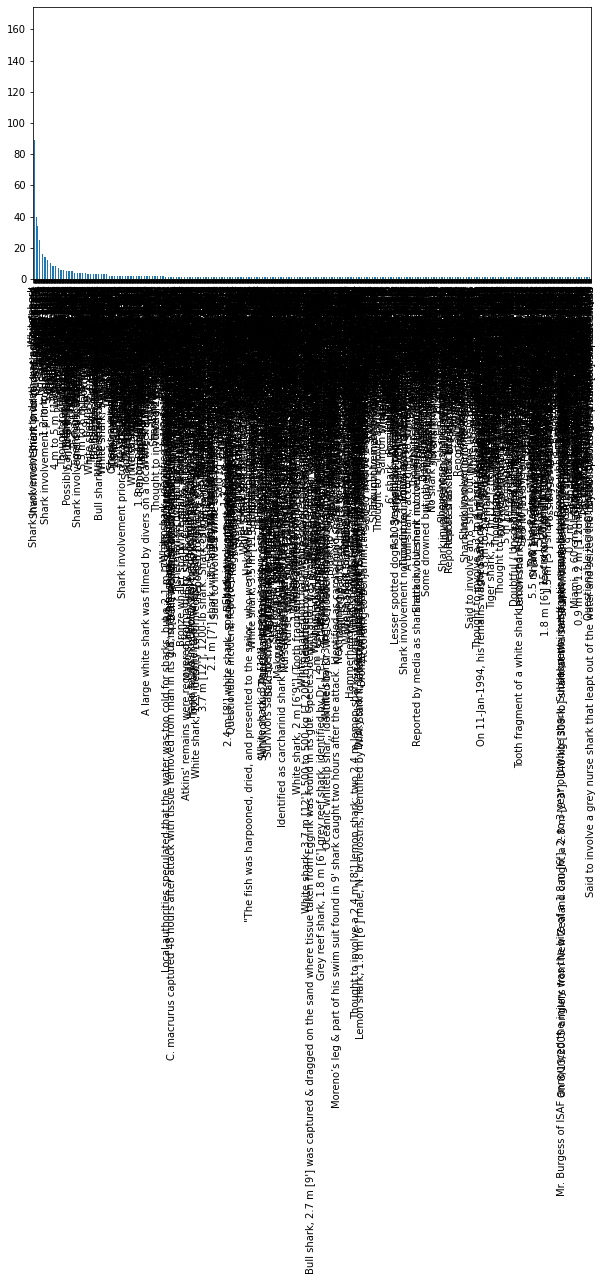

In [21]:
sad.Species.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Species'>

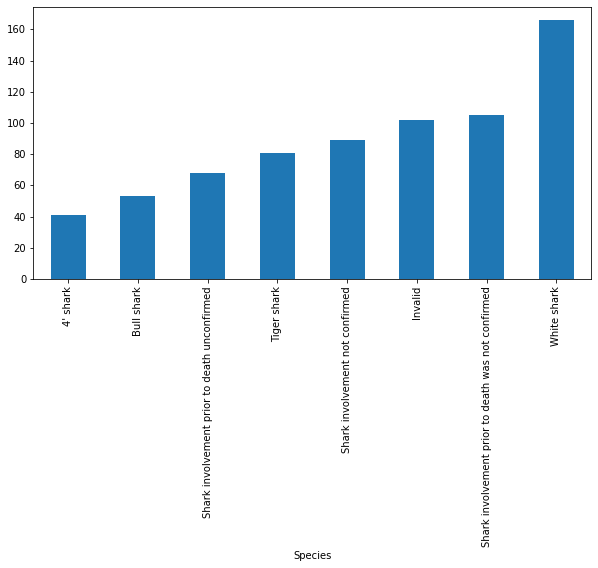

In [22]:
species_count = sad.groupby("Species").count().Date.sort_values()
species_count[species_count > 40].plot(kind="bar") 

# Making change to data

In [115]:
sad['']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


# Filtering Data

In [117]:
# & means and while | means or
sad.loc[(sad['Country'] == 'AUSTRALIA') & (sad['Area'] == 'New South Wales')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
16,2019.12.20,20-Dec-2019,2019.0,Provoked,AUSTRALIA,New South Wales,Shellharbour,Fishing,NaN,NaN,...,White shark,"B. Myatt, GSAF",2019.12.20-Shellharbour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.20,2019.12.20,6488.0,NaN,NaN
35,2019.10.05.b,05-Oct-2019,2019.0,Unprovoked,AUSTRALIA,New South Wales,Lighthouse Beach,Surfing,Mike Bruton,NaN,...,"White shark, 3.5 m",B.Myatt & M. Michaelson GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2019.06.05,05-Jun-2019,2019.0,Unverified,AUSTRALIA,New South Wales,Lennox Head,Surfing,male,NaN,...,NaN,"M. Michaelson, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2019.04.27.R,Reported 27-Apr-2019,2019.0,Unprovoked,AUSTRALIA,New South Wales,Tomaree,Spearfishing,Max Carey,NaN,...,"Grey nurse shark, 3 m female","Kevin McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,1791.00.00,1791,1791.0,Unprovoked,AUSTRALIA,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,...,NaN,"G.P. Whitley; D. Baldridge, p.162",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6296,1788.05.10,10-May-1788,1788.0,Watercraft,AUSTRALIA,New South Wales,Sydney Harbor,Fishing,boat,NaN,...,NaN,"G.P. Whitley citing J. Cobley, Sydney Cove, p....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6336,0005.00.00,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,NaN,...,NaN,Waverly Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6437,ND.0025,Before 1927,0.0,Unprovoked,AUSTRALIA,New South Wales,"Spectacle Island, Port Jackson",NaN,"male, the Sergeant of Marines",NaN,...,NaN,H. Capper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adding month column

In [209]:
sad = sad.drop(sad.index[6330:])
sad.head

<bound method NDFrame.head of        Case Number           Date    Year        Type      Country  \
0       2020.02.05    05-Feb-2020  2020.0  Unprovoked          USA   
1     2020.01.30.R    30-Jan-2020  2020.0    Provoked      BAHAMAS   
2       2020.01.17    17-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
3       2020.01.16    16-Jan-2020  2020.0  Unprovoked  NEW ZEALAND   
4       2020.01.13    13-Jan-2020  2020.0  Unprovoked          USA   
...            ...            ...     ...         ...          ...   
6325  1638.00.00.R  Reported 1638  1638.0  Unprovoked          NaN   
6326  1637.00.00.R  Reported 1637  1637.0  Unprovoked        INDIA   
6327  1617.00.00.R  Reported 1617  1617.0  Unprovoked        INDIA   
6328    1642.00.00           1642  1642.0  Unprovoked          USA   
6329    1595.00.00           1595  1595.0  Unprovoked        INDIA   

                 Area                         Location  \
0                Maui                              NaN   
1            

In [216]:
#nan_new_sad = new_sad[new_sad.isna().any(axis=1)]
#nan_new_sad.head(100)

#check_for_nan= new_sad['Case Number'].isnull().values.any()
#print(check_for_nan)

#count_nan = new_sad['Case Number'].isnull().sum()
#print ('Count of NaN: ' + str(count_nan))
#count_nan.head()

sad = sad[sad['Case Number'].isna()]

print (sad)

sad = sad.dropna(subset=['Case Number'])


Empty DataFrame
Columns: [Case Number, Date, Year, Type, Country, Area, Location, Activity, Name, Gender, Age, Injury, Fatal (Y/N), Time, Species, Investigator or Source, pdf, href formula, href, Case Number.1, Case Number.2, original order, Unnamed: 22, Unnamed: 23, Month, value_is_NaN]
Index: []

[0 rows x 26 columns]


In [212]:
sad['Month'] = sad['Case Number'].str[5:7]
sad['Month'] = sad['Month'].astype('int')
sad.head()

ValueError: cannot convert float NaN to integer

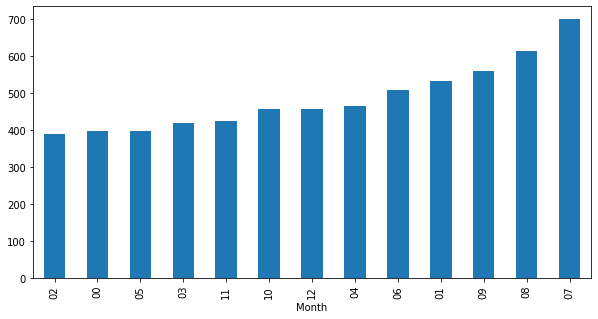

In [211]:
month_count = sad.groupby("Month").count().Date.sort_values()
month_count[month_count > 1].plot(kind="bar")
month_count.replace("01", "Jan")
plt.show()

# 2. NUMBER OF ATTACKS AROUND THE WORLD

<font color='yellow'>LOOK AT HOW THERE IS AN INCREASE AROUND 1958-1960's, WHY? INVESTIGATE THIS!</font> 

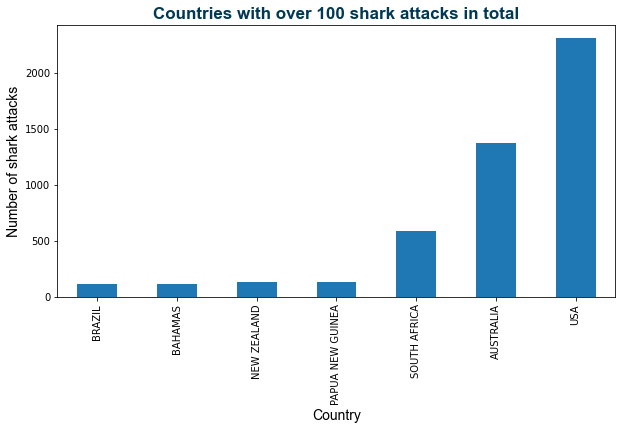

In [170]:
country_count = sad.groupby("Country").count().Date.sort_values()
country_count[country_count > 100].plot(kind="bar")

plt.title('Countries with over 100 shark attacks in total', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Country', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

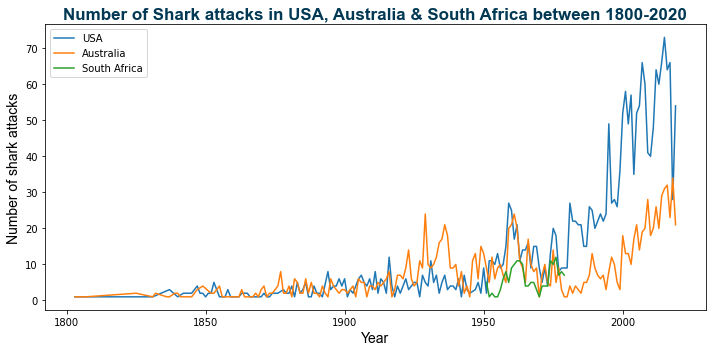

In [165]:
sad[(sad.Country == "USA") & (sad.Year < 2020) & (sad.Year > 1800)].groupby("Year").count().Date.plot()
sad[(sad.Country == "AUSTRALIA") & (sad.Year < 2020) & (sad.Year > 1800)].groupby("Year").count().Date.plot()
sad[(sad.Country == "SOUTH AFRICA") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()

plt.title('Number of Shark attacks in USA, Australia & South Africa between 1800-2020', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Year', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.legend(['USA', 'Australia', 'South Africa'])
plt.tight_layout()
plt.show()

The year since the 1950s; particularly for surfers, snorkelers and SCUBA divers who can enter the water at any time of the year and extend the time they spend in the water in areas that, in earlier decades, were likely to be too cold for recreational purposes

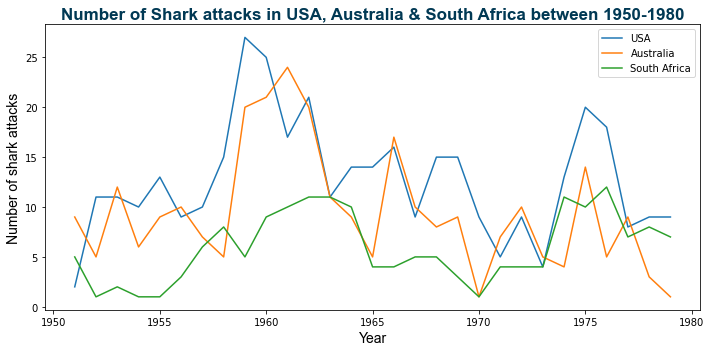

In [164]:
usa= sad[(sad.Country == "USA") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()
aus= sad[(sad.Country == "AUSTRALIA") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()
sa= sad[(sad.Country == "SOUTH AFRICA") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()

plt.title('Number of Shark attacks in USA, Australia & South Africa between 1950-1980', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Year', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.tight_layout()

plt.legend(['USA', 'Australia', 'South Africa'])
plt.show()

https://www.floridamuseum.ufl.edu/science/how-a-century-of-fear-turned-deadly-for-sharks/

<font color='yellow'>LOOK AT THE RISE IN ACTIVITIES SINCE 1960's and see if this correlates with the date and stament said before!</font> 

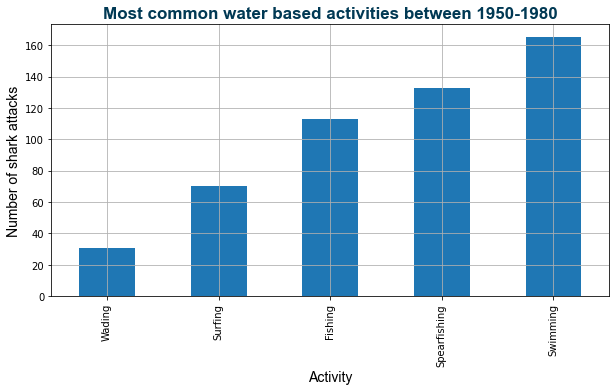

In [102]:
country_count = sad[(sad.Year < 1980) & (sad.Year > 1950)].groupby("Activity").count().Date.sort_values()
country_count[country_count > 30].plot(kind="bar") 

plt.title('Most common water based activities between 1950-1980', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Activity', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.grid()
plt.show()

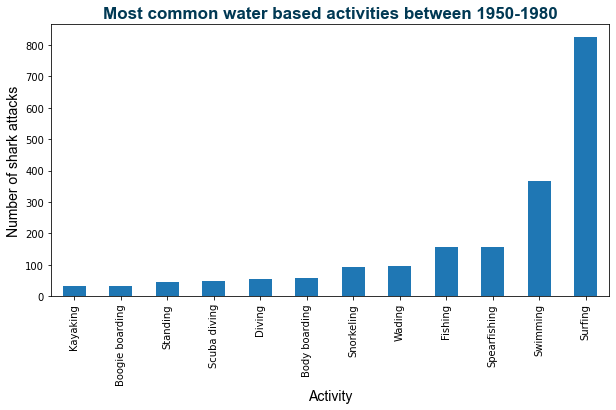

In [45]:
country_count = sad[(sad.Year < 2020) & (sad.Year > 1990)].groupby("Activity").count().Date.sort_values()
country_count[country_count > 30].plot(kind="bar") 

plt.title('Most common water based activities between 1950-1980', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Activity', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

<AxesSubplot:xlabel='Year'>

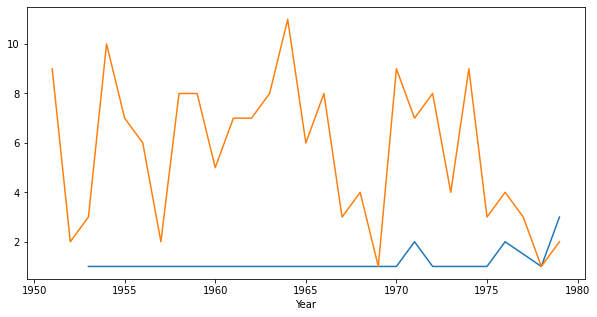

In [36]:
sad[(sad.Activity == "Scuba diving") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()
sad[(sad.Activity == "Swimming") & (sad.Year < 1980) & (sad.Year > 1950)].groupby("Year").count().Date.plot()


___

<font color='orange'>ALL CODE BELOW IS RUBBISH JUST TESTING DIFFERENT THINGS!</font> 

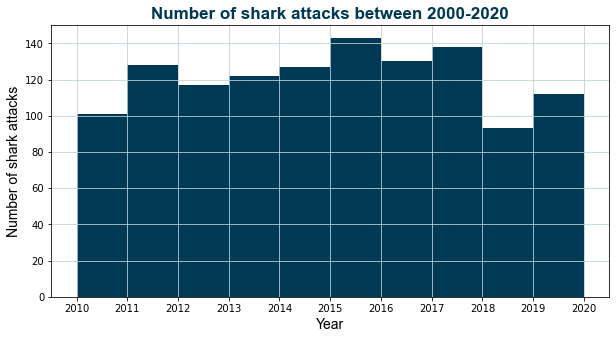

In [18]:
bins = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

plt.hist(sad["Year"], bins=bins, color='#013954')
plt.xticks(bins)

plt.ylabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.xlabel('Year', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.title('Number of shark attacks between 2000-2020', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.grid(True,color='#bfd2d9')

plt.show()

- During which months specificly were people being attacked? Summer, winter, etc...
 / colour code these colours accorddingly so we can clearly differenciate the seasons
 / Add a lengend/key

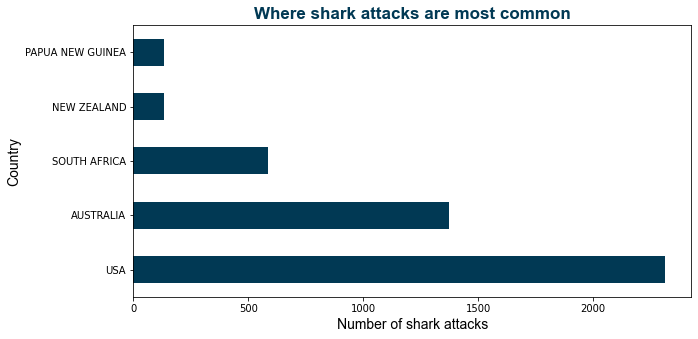

In [23]:
Season_attacks = sad['Country'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#013954')

plt.title('Where shark attacks are most common', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Country', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

- Where are people being attack the most worldwide?
/ Top 10 list with numbers

- Looking more in Australia which states have the most attacked

HOW TO MAKE MONTH SPECIFIC DATA

- NSW look at a map and findout where /which locations are being attcked

 HOW DO I NARROW THIS DOWN TO AUSTRALIAN STATE????

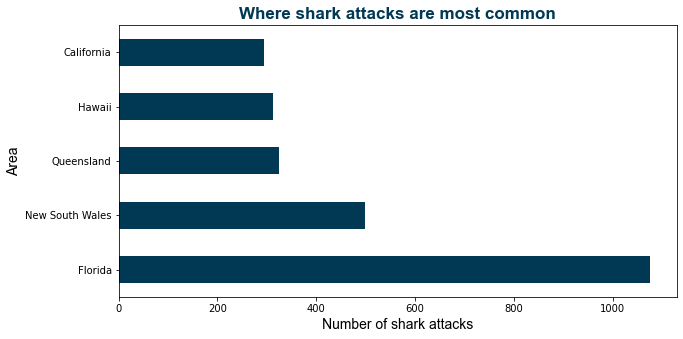

In [24]:
Season_attacks = sad['Area'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#013954')

plt.title('Where shark attacks are most common', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#013954')
plt.xlabel('Number of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Area', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()

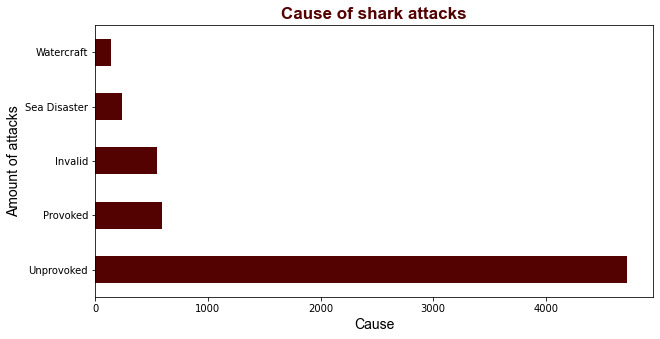

In [25]:
Season_attacks = sad['Type'].value_counts()[:5]
Season_attacks.plot(kind='barh', color='#540101')

plt.title('Cause of shark attacks', fontdict={'fontname': 'Arial', 'fontsize':17, 'fontweight':'bold'}, color='#540101')
plt.xlabel('Cause', fontdict={'fontname': 'Arial', 'fontsize':14})
plt.ylabel('Amount of attacks', fontdict={'fontname': 'Arial', 'fontsize':14})

plt.show()